<h1> Importing Libraries<\h1>

In [191]:
#impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
import random 
import missingno as msno
import numpy as np

<h1> Reading data<\h1>

<h4> data link :https://archive.ics.uci.edu/ml/datasets/BitcoinHeistRansomwareAddressDataset</h4>

In [192]:
# Imorting data and dividing two diffrent data
df = pd.read_csv("BitcoinHeistData.csv")

whole_white_data = df[df['label']=='white']

black_data = df[df['label']!='white']

<h1> Sampling white data<\h1>

In [193]:
# Random selection and down sampling of the white data
whole_white_data.count()
white_data = []
white_data = whole_white_data.iloc[random.sample(range(len(whole_white_data)), 100000)]



<h1> Viewing Data<\h1>

In [194]:
#Previwing both data
print(white_data.head())

print(black_data.head())

                                    address  year  day  length    weight  \
1369219  16tiHQe2wGHCrvN5ypi7m7mvu2QGfXWdpA  2014  243     144  0.003818   
1982510  1BZ77iNyrWj6D5ieFEB9YApAAPzEnwmnDQ  2016  126      36  0.203902   
2576599  16TwTKrkVP4P8RFf4m8MDxBLmaXQKr5MJo  2017  355       2  0.500000   
1629197  1LMn42nSzkh7iGRA6FxuNgeXjjtRvvH1RM  2015  138     144  0.034346   
1094789  1NJETB8eVR8HCE6TMTtuiW1qyVNXxNBNkK  2013  334      12  0.140625   

         count  looped  neighbors       income  label  
1369219   1243    1241          2  187900000.0  white  
1982510     41       0          2  397320000.0  white  
2576599      1       0          2  170000000.0  white  
1629197     39       0          2  199502432.0  white  
1094789      2       0          2  200000000.0  white  
                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132     

In [195]:
#Overridding  black labels
black_data['label']= 'black'

#print(df1.label.unique())

<h1> Joining data<\h1>

In [196]:
#Appending black data to white data
df1 = black_data.append(white_data)

#df1.to_csv('data.csv',index=False)
df1.describe()

,year,day,length,weight,count,looped,neighbors,income
count,141413.000000,141413.000000,141413.000000,1.414130e+05,141413.000000,141413.000000,141413.000000,1.414130e+05
mean,2014.580371,179.634758,43.898057,5.782864e-01,681.568307,193.957380,2.215574,2.933537e+09
std,2.055728,101.405115,58.796738,3.235896e+00,1610.410875,859.395699,12.620909,6.082480e+10
min,2011.000000,1.000000,0.000000,3.962064e-82,1.000000,0.000000,1.000000,3.000000e+07
25%,2013.000000,91.000000,2.000000,3.125000e-02,1.000000,0.000000,1.000000,7.834967e+07
50%,2015.000000,174.000000,8.000000,2.619048e-01,1.000000,0.000000,2.000000,1.758004e+08
75%,2016.000000,268.000000,98.000000,1.000000e+00,46.000000,0.000000,2.000000,6.633265e+08
max,2018.000000,365.000000,144.000000,7.061994e+02,14496.000000,13873.000000,1656.000000,1.500000e+13


In [197]:
#viwing data type of columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141413 entries, 0 to 2331352
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   address    141413 non-null  object 
 1   year       141413 non-null  int64  
 2   day        141413 non-null  int64  
 3   length     141413 non-null  int64  
 4   weight     141413 non-null  float64
 5   count      141413 non-null  int64  
 6   looped     141413 non-null  int64  
 7   neighbors  141413 non-null  int64  
 8   income     141413 non-null  float64
 9   label      141413 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 11.9+ MB


<h1> Modification of data type<\h1>

In [198]:
#Changinging data type 'year','day'and 'label' to category
df1['year'] = df1['year'].astype('category')
df1['day'] = df1['day'].astype('category')
df1['label'] = df1['label'].astype('category')
df1['address'] = df1['address'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141413 entries, 0 to 2331352
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   address    141413 non-null  category
 1   year       141413 non-null  category
 2   day        141413 non-null  category
 3   length     141413 non-null  int64   
 4   weight     141413 non-null  float64 
 5   count      141413 non-null  int64   
 6   looped     141413 non-null  int64   
 7   neighbors  141413 non-null  int64   
 8   income     141413 non-null  float64 
 9   label      141413 non-null  category
dtypes: category(4), float64(2), int64(4)
memory usage: 14.6 MB


<h1> Analysis (EDA) <\h1>

In [199]:
#verifing unique years
df1['year'].unique()

[2017, 2016, 2013, 2014, 2015, 2012, 2011, 2018]
Categories (8, int64): [2017, 2016, 2013, 2014, 2015, 2012, 2011, 2018]

In [200]:
#verifing uniqe days
df1['day'].unique()

[11, 132, 246, 322, 238, ..., 129, 42, 15, 16, 365]
Length: 365
Categories (365, int64): [11, 132, 246, 322, ..., 42, 15, 16, 365]

In [201]:
#Checking for duplicates
duplicates = df1.duplicated()

df1[duplicates]


,address,year,day,length,weight,count,looped,neighbors,income,label


In [202]:
#Checking yearly distribution of the data 
df1.groupby('year').count()

,address,day,length,weight,count,looped,neighbors,income,label
year,,,,,,,,,
2011,12596,12596,12596,12596,12596,12596,12596,12596,12596
2012,13508,13508,13508,13508,13508,13508,13508,13508,13508
2013,20145,20145,20145,20145,20145,20145,20145,20145,20145
2014,23017,23017,23017,23017,23017,23017,23017,23017,23017
2015,16298,16298,16298,16298,16298,16298,16298,16298,16298
2016,28265,28265,28265,28265,28265,28265,28265,28265,28265
2017,16143,16143,16143,16143,16143,16143,16143,16143,16143
2018,11441,11441,11441,11441,11441,11441,11441,11441,11441


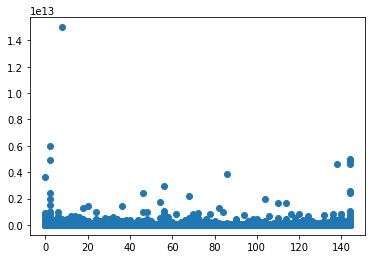

In [203]:
#Visulaising length vs income of data

plt.scatter(x='length' , y = 'income' , data = df1)
plt.show()

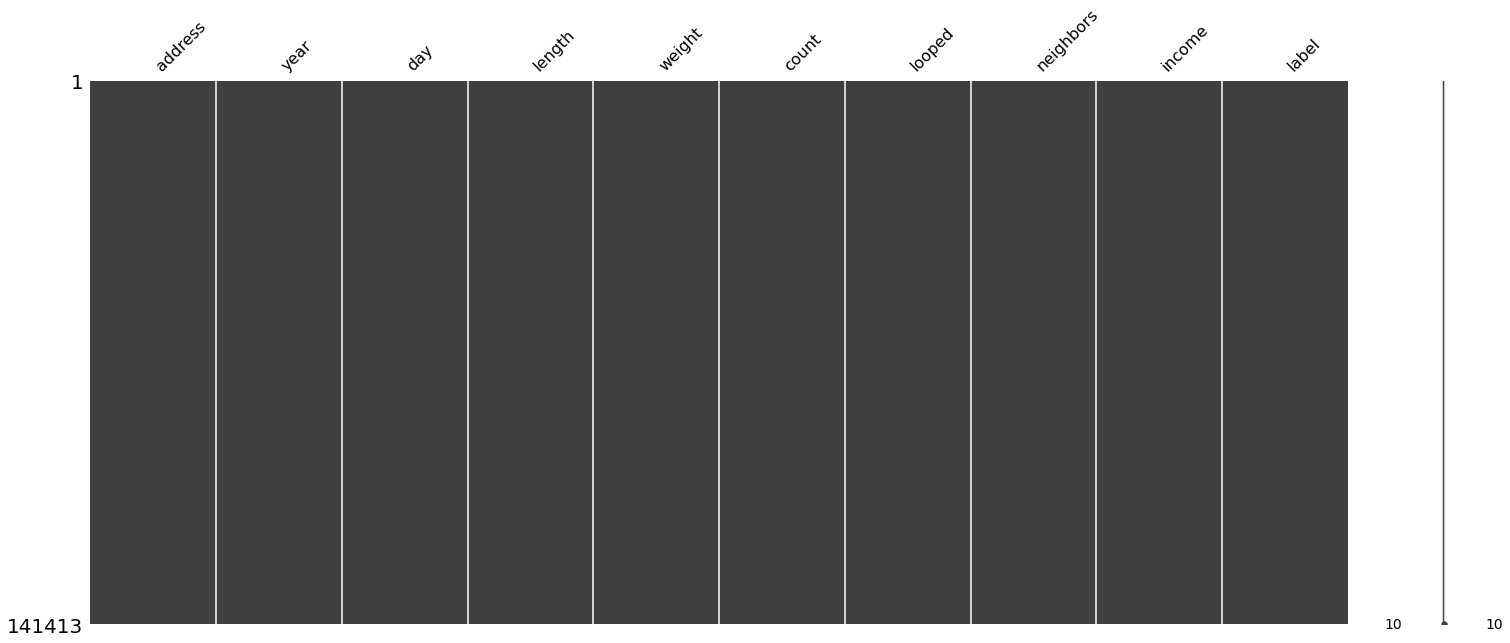

In [204]:
#verifing missing number
msno.matrix(df1)
plt.show()

In [205]:
#duplicate address checking (transactaion from same address)
duplicates1 = df1.duplicated(subset=['address'],keep=False)

df1[duplicates1].groupby('address').count()


,year,day,length,weight,count,looped,neighbors,income,label
address,,,,,,,,,
1111111111111111111114oLvT2,0,0,0,0,0,0,0,0,0
111JbRFCHSWKnngK6KGu47MCiiCZYUf2i,0,0,0,0,0,0,0,0,0
111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,0,0,0,0,0,0,0,0,0
11214HSxfhhjHLq44kNAx8DETZdR5pQXKy,0,0,0,0,0,0,0,0,0
1121iYh8TTe5QkrMStCfXAashiGKBy72L1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3R1jNHabVPJhBPW1tEFpcFTcvhUFGkJUWJ,0,0,0,0,0,0,0,0,0
3R1vr8nmrv8pdwqmoGpDXPvdAScoZD6Rqr,0,0,0,0,0,0,0,0,0
3R2CiQNTnw5emmbH7KgFogpMNhei2NYP1j,0,0,0,0,0,0,0,0,0


In [206]:
#duplicate address (transaction on same year)

duplicates2 = df1.duplicated(subset=['address','year'],keep=False)

dup_df1 = df1[duplicates2].groupby(['address','year']).count()

dup_df1

day  length  weight  count  looped  \
address                            year                                       
1111111111111111111114oLvT2        2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
...                                      ...     ...     ...    ...     ...   
3R2R4XNC67Ez4YVarM6mYB6pdZVehNdzuH 2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  NaN     NaN     NaN    NaN     NaN   
                                   2018  NaN     NaN     NaN    NaN     NaN   

                                         neighbors  income  label  
address                            year                            
1111111111111111111114oLvT2        2011        NaN     NaN    NaN  
                                   2012        NaN     NaN    NaN  
                                   2013        NaN     NaN    NaN  
                                   2014        NaN     NaN    NaN  
                                   2015        NaN     NaN    NaN  
...                                            ...     ...    ...  
3R2R4XNC67Ez4YVarM6mYB6pdZVehNdzuH 2014        NaN     NaN    NaN  
                                   2015        NaN     NaN    NaN  
                                   2016        NaN     NaN    NaN  
                                   2017        NaN     NaN    NaN  
                                   2018        NaN     NaN    NaN  

[954296 rows x 8 columns]

In [207]:
#removing NAN value
#dup_df1.agg(lambda x: np.nan if x.isnull().all() else x.dropna())
dup_df1.dropna()

,,day,length,weight,count,looped,neighbors,income,label
address,year,,,,,,,,
112r9o1huiATtkWw3jsgEd4LLFw2M54qRM,2011,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
112wED5uHhY1aiSaWAzgeMDaCKFcCvj9Pn,2016,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
113i99LGHX2ZzBed1SaMpnqb6ruRgbBwMc,2014,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
114AndoJYuLt5YdXFA4HZjq2PKhe4ggP88,2012,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
114TqaapeRvrQzuwsxQHxLWsg7uYWewx3c,2014,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
3P1sThUfzBZKm2eRqR94Xgyq9tXtiWwFiH,2017,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3P6CEEVEbFQSSB33G2MCkwtAf6UhemGQGL,2018,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3PXNyJEvuZRdMPB533EPsUDfJaTeffkUs7,2018,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [208]:
#duplicate address (transaction on same day)

duplicates3 = df1.duplicated(subset=['address','year','day'],keep=False)

df1[duplicates3]

,address,year,day,length,weight,count,looped,neighbors,income,label


<h1> Visualization<\h1>

In [209]:
#importing plotting libraries
import seaborn as sns

In [210]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141413 entries, 0 to 2331352
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   address    141413 non-null  category
 1   year       141413 non-null  category
 2   day        141413 non-null  category
 3   length     141413 non-null  int64   
 4   weight     141413 non-null  float64 
 5   count      141413 non-null  int64   
 6   looped     141413 non-null  int64   
 7   neighbors  141413 non-null  int64   
 8   income     141413 non-null  float64 
 9   label      141413 non-null  category
dtypes: category(4), float64(2), int64(4)
memory usage: 14.6 MB


In [211]:
#sns.pairplot(df1)
#plt.show()

In [212]:
df1.corr()

,length,weight,count,looped,neighbors,income
length,1.000000,0.012848,0.709491,0.381861,0.045083,0.005526
weight,0.012848,1.000000,0.024035,0.076062,0.622354,0.159352
count,0.709491,0.024035,1.000000,0.530102,0.030909,-0.003966
looped,0.381861,0.076062,0.530102,1.000000,0.071955,0.009127
neighbors,0.045083,0.622354,0.030909,0.071955,1.000000,0.310278
income,0.005526,0.159352,-0.003966,0.009127,0.310278,1.000000


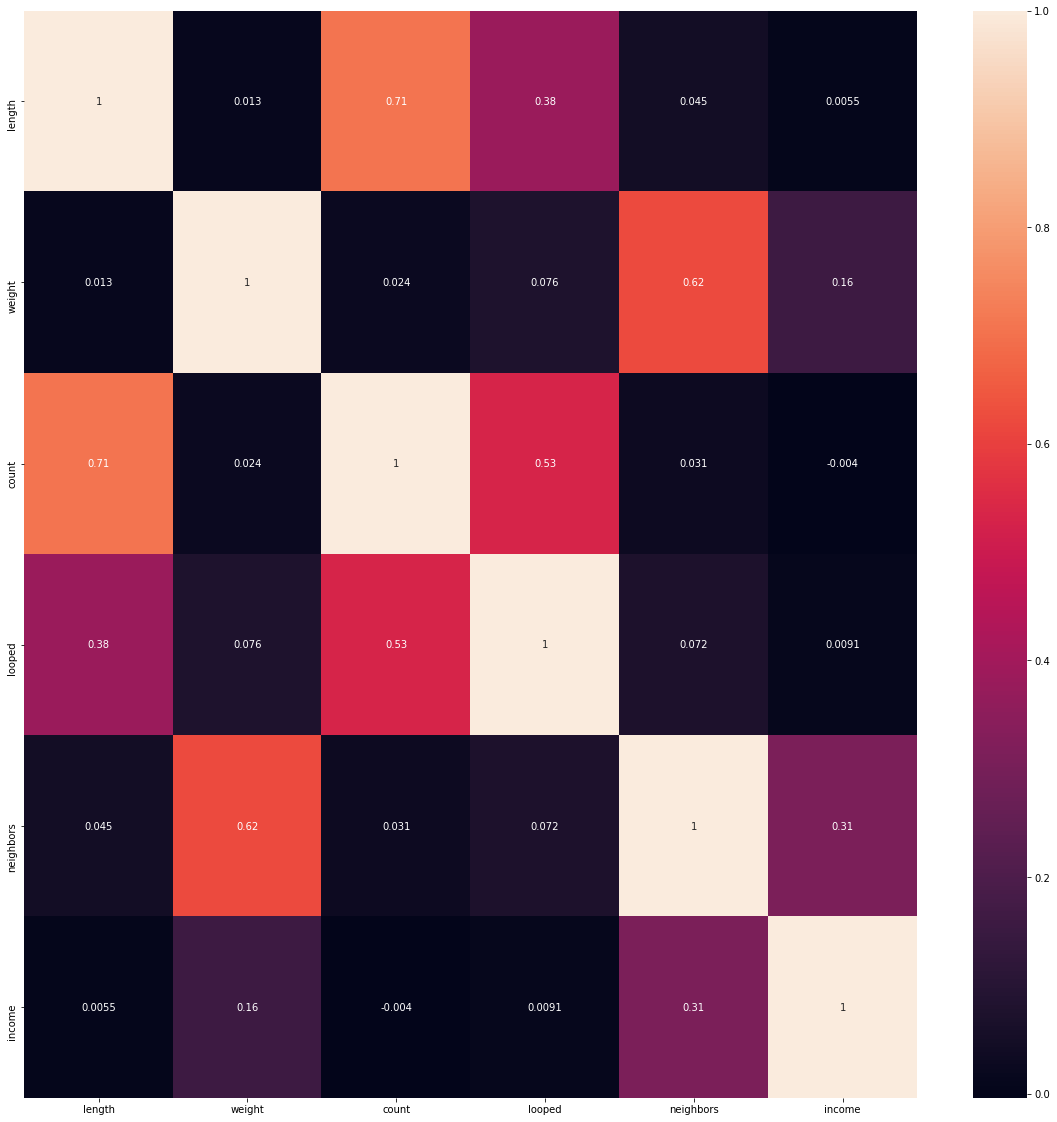

<Figure size 432x288 with 0 Axes>

In [213]:
_=plt.figure(figsize=(20,20))
_=sns.heatmap(df1.corr(),annot=True)
plt.show()
plt.savefig("ransomware_heatmap.jpg")

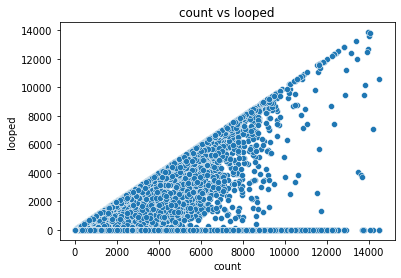

In [214]:
sns.scatterplot(x='count',y='looped',data = df1)
plt.xlabel('count')
plt.ylabel('looped')
plt.title('count vs looped')
plt.show()

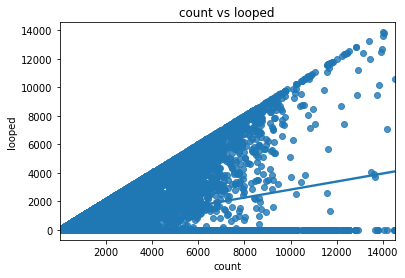

In [215]:
sns.regplot (x='count',y='looped',data = df1)
plt.xlabel('count')
plt.ylabel('looped')
plt.title('count vs looped')
plt.show()

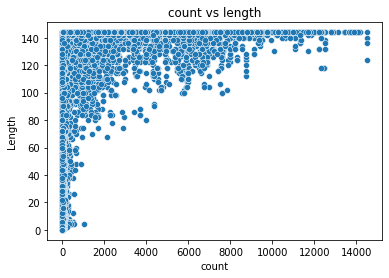

In [216]:
sns.scatterplot(x='count',y='length',data = df1)
plt.xlabel('count')
plt.ylabel('Length')
plt.title('count vs length')
plt.show()

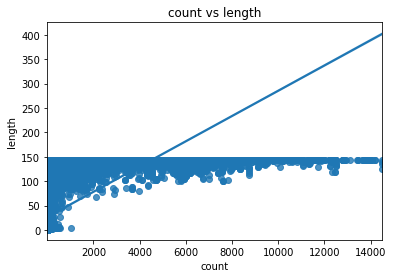

In [217]:
sns.regplot (x='count',y='length',data = df1)
plt.xlabel('count')
plt.ylabel('length')
plt.title('count vs length')
plt.show()

<Figure size 2880x1440 with 0 Axes>

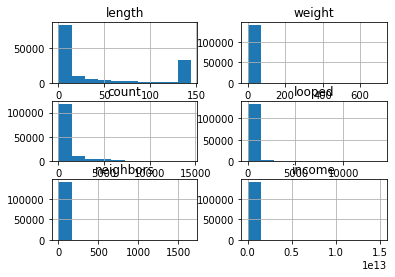

In [218]:
_=plt.figure(figsize=(40,20))
_=df1.hist()
plt.show()

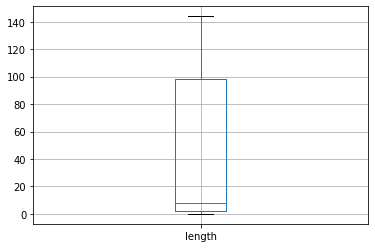

In [219]:
df1[['length']].boxplot()
plt.show()

<h1> Feature Engineering and Modeling using pipeline <\h1>

In [220]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import time

In [221]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141413 entries, 0 to 2331352
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   address    141413 non-null  category
 1   year       141413 non-null  category
 2   day        141413 non-null  category
 3   length     141413 non-null  int64   
 4   weight     141413 non-null  float64 
 5   count      141413 non-null  int64   
 6   looped     141413 non-null  int64   
 7   neighbors  141413 non-null  int64   
 8   income     141413 non-null  float64 
 9   label      141413 non-null  category
dtypes: category(4), float64(2), int64(4)
memory usage: 14.6 MB


<h2> Transformig data manually<\h2>

In [222]:
X = df1.iloc[:,:-1]
y = df1['label']

numeric_features = ['length', 'weight','count','looped','neighbors','income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['address', 'year', 'day']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])




<h2> Base logistic Regression using pipeline for feature engineering : Model Score : 87.7% ,Overall time : 11.3 Sec<\h2>

In [223]:
lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(max_iter=150))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

start=time.time()

lr_clf.fit(X_train, y_train)

print("model score: %.3f" % lr_clf.score(X_test, y_test))

end = time.time()

print("Over all time taken : ", end-start)

model score: 0.877
Over all time taken :  10.865621328353882


<h2> Hyperparameter tuning of logistic Regression using Gridsearch and  pipeline for feature engineering : Best Model Score : 89.4% Training time: 1Hr 17 min<\h2>

In [183]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
    'classifier__max_iter': [150,200,500,650,]
}
start = time.time()

lr_grid_clf = GridSearchCV(lr_clf, param_grid, cv=10)
lr_grid_clf.fit(X_train, y_train)

print(("best logistic regression from grid search: %.3f" % lr_grid_clf.score(X_test, y_test)))

end = time.time()

print("Training time taken : ", end-start)

best logistic regression from grid search: 0.894
Training time taken :  4674.489832162857


<h2> Best logistic Regression Model Scores and confusion matrix<\h2>

In [184]:
start = time.time()

y_pred = lr_grid_clf.predict(X_test)

end = time.time()

print("Predicting time taken : ", end-start)

Predicting time taken :  0.9030518531799316


In [185]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred,pos_label='white')))
print('Recall Score : ' + str(recall_score(y_test,y_pred,pos_label='white')))
print('F1 Score : ' + str(f1_score(y_test,y_pred,pos_label='white')))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8938451094642756
Precision Score : 0.9160480391775817
Recall Score : 0.936690247198156
F1 Score : 0.926254151028669
Confusion Matrix : 
[[ 8032  2160]
 [ 1593 23569]]


<h2> Best logistic Regression Model's hyper parametrs<\h2>

In [52]:
lr_grid_clf.best_params_

{'classifier__C': 100,
 'classifier__max_iter': 500,
 'preprocessor__num__imputer__strategy': 'mean'}

<h2> Top 10 logistic Regression Model with Scores and hyperparameter<\h2>

In [53]:
lr_grid_clf_results = pd.DataFrame.from_dict(lr_grid_clf.cv_results_,orient='index').transpose().sort_values(['rank_test_score'])

lr_grid_clf_results[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__max_iter,param_preprocessor__num__imputer__strategy,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
23,20.0071,0.891928,0.735342,0.0164937,100,500,median,"{'classifier__C': 100, 'classifier__max_iter':...",0.894211,0.892042,...,0.889779,0.890345,0.893079,0.891194,0.892325,0.891005,0.887977,0.891475,0.00171857,1
22,19.0902,0.215028,0.771144,0.0182901,100,500,mean,"{'classifier__C': 100, 'classifier__max_iter':...",0.894211,0.892042,...,0.889779,0.890345,0.893079,0.891194,0.892325,0.891005,0.887977,0.891475,0.00171857,1
21,9.11492,0.129242,0.772944,0.013413,100,200,median,"{'classifier__C': 100, 'classifier__max_iter':...",0.891854,0.888459,...,0.889591,0.890722,0.891571,0.892231,0.895437,0.891759,0.890146,0.891447,0.00181587,3
20,9.00702,0.120666,0.761744,0.00839158,100,200,mean,"{'classifier__C': 100, 'classifier__max_iter':...",0.891854,0.888459,...,0.889591,0.890722,0.891571,0.892231,0.895437,0.891759,0.890146,0.891447,0.00181587,3
17,19.21,0.181056,0.763144,0.0132103,10,500,median,"{'classifier__C': 10, 'classifier__max_iter': ...",0.892042,0.889779,...,0.889025,0.888931,0.891288,0.888365,0.892137,0.890251,0.887317,0.890071,0.00157756,5
16,19.1232,0.158518,0.753343,0.00462734,10,500,mean,"{'classifier__C': 10, 'classifier__max_iter': ...",0.892042,0.889779,...,0.889025,0.888931,0.891288,0.888365,0.892137,0.890251,0.887317,0.890071,0.00157756,5
15,9.20563,0.293433,0.750243,0.0115574,10,200,median,"{'classifier__C': 10, 'classifier__max_iter': ...",0.891005,0.891477,...,0.889591,0.888554,0.891571,0.885442,0.889779,0.890439,0.887694,0.889609,0.00181661,7
14,9.71246,0.488718,0.807246,0.0698335,10,200,mean,"{'classifier__C': 10, 'classifier__max_iter': ...",0.891005,0.891477,...,0.889591,0.888554,0.891571,0.885442,0.889779,0.890439,0.887694,0.889609,0.00181661,7
19,5.73903,0.0730125,0.770344,0.0150677,100,100,median,"{'classifier__C': 100, 'classifier__max_iter':...",0.890628,0.888177,...,0.886385,0.891194,0.891571,0.886291,0.888459,0.886574,0.884111,0.888373,0.00238516,9
18,5.83523,0.294218,0.782745,0.0560408,100,100,mean,"{'classifier__C': 100, 'classifier__max_iter':...",0.890628,0.888177,...,0.886385,0.891194,0.891571,0.886291,0.888459,0.886574,0.884111,0.888373,0.00238516,9


<h2>Base Random Forest classifier with pipeline for feature engineering : accuracy score :91.5 time taken:21 min <\h2>

In [55]:
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
clf = RandomForestClassifier()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])
start = time.time()

rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf)))

end = time.time()

print("Overall time taken : ", end-start)

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
Accuracy Score : 0.9156531085591446
Overall time taken :  1286.8735539913177


<h2>Hyper-parameter tuning for random forest classifier <\h2>

In [176]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#max_depth = [5, 8, 15, 25, 30]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# 
# Create the random grid
random_grid = {
               'classifier__max_features': max_features,
               'classifier__max_depth': max_depth,
               'classifier__min_samples_split': min_samples_split,
               'classifier__min_samples_leaf': min_samples_leaf,
               'classifier__bootstrap': bootstrap,
               'preprocessor__num__imputer__strategy': ['mean', 'median']}
pprint(random_grid)




{'classifier__bootstrap': [True, False],
 'classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'classifier__max_features': ['auto', 'sqrt'],
 'classifier__min_samples_leaf': [1, 2, 4],
 'classifier__min_samples_split': [2, 5, 10],
 'preprocessor__num__imputer__strategy': ['mean', 'median']}


<h2>Random Forest classifier with Auto transformation of columns using random search with prameter grid and pipeline for feature engineering : accuracy score : 92% Training time :1 Hr 47 Min <\h2>

In [49]:
# Use the random grid to search for best hyperparameters

from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import RandomizedSearchCV


preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))])


rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

strat = time.time()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_rs_clf = RandomizedSearchCV(rf_clf,param_distributions=random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_rs_clf.fit(X_train, y_train)

end = time.time()

print("Training time taken : ", end-start)

NameError: name 'random_grid' is not defined

<h2>Best Random Forest classifier scores and confusion matrix <\h2>

In [58]:
start=time.time()

y_pred_rf2 = rf_rs_clf.predict(X_test)

end = time.time()

print("Prediction time taken : ", end-start)

print(("best Random Forest Classifier from grid search: %.3f" % rf_rs_clf.score(X_test, y_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf2)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf2)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf2,pos_label='white')))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf2,pos_label='white')))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf2,pos_label='white')))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_rf2)))


Prediction time taken :  11.82067608833313
best Random Forest Classifier from grid search: 0.920
Accuracy Score : 0.9199241952820049
Accuracy Score : 0.9199241952820049
Precision Score : 0.9423545872476514
Recall Score : 0.944355420238763
F1 Score : 0.9433539428136943
Confusion Matrix : 
[[ 8950  1442]
 [ 1389 23573]]


<h2>Best Random Forest classifier parameters <\h2>

In [59]:
pd.DataFrame([rf_rs_clf.best_params_])

,preprocessor__num__imputer__strategy,classifier__min_samples_split,classifier__min_samples_leaf,classifier__max_features,classifier__max_depth,classifier__bootstrap
0,median,5,1,sqrt,None,False


<h2>Top 10 Random Forest classifier scores and ranking <\h2>

In [60]:
results_df=pd.DataFrame.from_dict(rf_random.cv_results_,orient='index').transpose()

results_df.sort_values(['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num__imputer__strategy,param_classifier__min_samples_split,param_classifier__min_samples_leaf,param_classifier__max_features,param_classifier__max_depth,param_classifier__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
17,1074.68,11.8561,15.3299,0.651642,median,5,1,sqrt,None,False,{'preprocessor__num__imputer__strategy': 'medi...,0.915566,0.914095,0.910531,0.913397,0.00211388,1
57,698.744,4.22704,14.4862,0.315598,mean,5,1,sqrt,None,True,{'preprocessor__num__imputer__strategy': 'mean...,0.90923,0.908438,0.906118,0.907929,0.00132029,2
36,233.321,2.36551,4.51159,0.0437772,median,2,1,sqrt,110,False,{'preprocessor__num__imputer__strategy': 'medi...,0.775521,0.773032,0.777784,0.775446,0.00194076,3
69,126.357,1.49996,4.60126,0.052659,mean,10,1,auto,110,False,{'preprocessor__num__imputer__strategy': 'mean...,0.77142,0.773343,0.774305,0.773023,0.00119949,4
33,128.68,2.07131,4.45425,0.0452648,median,5,1,auto,110,True,{'preprocessor__num__imputer__strategy': 'medi...,0.772155,0.775267,0.766639,0.771354,0.00356737,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,11.2893,0.203777,2.25113,0.00616477,mean,10,4,sqrt,70,True,{'preprocessor__num__imputer__strategy': 'mean...,0.707521,0.707521,0.707493,0.707512,1.33342e-05,54
66,14.3775,0.375349,2.73882,0.0902283,median,2,4,sqrt,None,False,{'preprocessor__num__imputer__strategy': 'medi...,0.707521,0.707521,0.707493,0.707512,1.33342e-05,54
67,13.3834,0.27975,2.71582,0.0912279,median,5,4,auto,50,False,{'preprocessor__num__imputer__strategy': 'medi...,0.707521,0.707521,0.707493,0.707512,1.33342e-05,54
98,9.80323,0.578948,2.09079,0.0319843,median,2,4,auto,20,True,{'preprocessor__num__imputer__strategy': 'medi...,0.707521,0.707521,0.707493,0.707512,1.33342e-05,54


<h2> Random Forest with removed corellated column, Random search. Time taken 40.7 hrs,Accuracy:92.5<\h2>

In [167]:
from sklearn.compose import make_column_selector as selector

X1 = df1.drop(['label','count'],axis=1)
y1 = df1['label']

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))])

X1 = preprocessor.fit_transform(X1)



X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)




In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


params = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

clf2 = RandomForestClassifier()

rf_rs_clf2 = RandomizedSearchCV(clf2,param_distributions=params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_rs_clf2.fit(X_train, y_train)

end = time.time()

print("Training time taken : ", end-start)





Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 154.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 348.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 533.2min finished


Training time taken :  146878.52346372604


In [179]:
start=time.time()

y_pred_rf3 = rf_rs_clf2.predict(X_test)

end = time.time()

print("Prediction time taken : ", end-start)

print(("best Random Forest Classifier from grid search: %.3f" % rf_rs_clf2.score(X_test, y_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf3)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_rf3)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_rf3,pos_label='white')))
print('Recall Score : ' + str(recall_score(y_test,y_pred_rf3,pos_label='white')))
print('F1 Score : ' + str(f1_score(y_test,y_pred_rf3,pos_label='white')))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_rf3)))

Prediction time taken :  13.095749139785767
best Random Forest Classifier from grid search: 0.926
Accuracy Score : 0.925552978446569
Accuracy Score : 0.925552978446569
Precision Score : 0.945631067961165
Recall Score : 0.9498467539704654
F1 Score : 0.9477342229635808
Confusion Matrix : 
[[ 8859  1372]
 [ 1260 23863]]


<h2>BASE SVC model : time take 41min, accuracy:87</h2>

In [268]:
from sklearn.svm import SVC

In [270]:
X1 = df1.drop(['label','count'],axis=1)
y1 = df1['label']

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))])

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)

In [273]:
start = time.time()

svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])


svc_clf.fit(X_train,y_train)


end = time.time()

print("Training time taken : ", end-start)

Training time taken :  2482.1559710502625


In [286]:
start=time.time()

y_pred_svc = svc_clf.predict(X_test)

end = time.time()

print("Prediction time taken : ", end-start)

print(("SVM score: %.3f" % svc_clf.score(X_test, y_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_svc)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_svc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_svc,pos_label='white')))
print('Recall Score : ' + str(recall_score(y_test,y_pred_svc,pos_label='white')))
print('F1 Score : ' + str(f1_score(y_test,y_pred_svc,pos_label='white')))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_svc)))

Prediction time taken :  134.319682598114
SVM score: 0.873
Accuracy Score : 0.8731119533857555
Accuracy Score : 0.8731119533857555
Precision Score : 0.9059937408390445
Recall Score : 0.9154224872913581
F1 Score : 0.9106837096324611
Confusion Matrix : 
[[ 7998  2373]
 [ 2113 22870]]


<h2>SVC model Random search: time take 71.2 hrs, accuracy: 90.6</h2>

In [282]:


svc_grid = {   'preprocessor__num__imputer__strategy': ['mean', 'median'],
               'classifier__C': [0.01,0.1,1.0,10.0,20.0,50.0],
               'classifier__break_ties': [True,False],
               'classifier__cache_size': [10,50,100,200,500,1000],
               'classifier__coef0': [0.001,1.0,20.0],
               'classifier__decision_function_shape': ['ovr'],`
               'classifier__degree': [2],
               'classifier__gamma': ['scale',0.01,1.0,10.0],
               'classifier__kernel': ['rbf', 'poly', 'rbf', 'sigmoid'],
               'classifier__probability': [True,False],
               'classifier__shrinking': [True,False],
               'classifier__tol': [0.001,0.01,0.1,1.0,10],
               'classifier__verbose': [True,False]}

svc_clf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC ( ))])
start = time.time()
svc_rs_clf2 = RandomizedSearchCV(svc_clf2,param_distributions=svc_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
svc_rs_clf2.fit(X_train, y_train)

end = time.time()

print("Training time taken : ", end-start)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 357.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 2398.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 4241.0min finished


Training time taken :  256405.38725447655


In [280]:
svc_clf2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__scaler', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__imputer__verbose', 'preprocessor__num__scaler__copy', 'preprocessor__num__scaler__with_mean', 'preprocessor__num__scaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__imputer', 'preprocessor__cat__onehot', 'preprocessor__cat__imputer__add_indicator', 'preprocess

In [288]:
start=time.time()

y_pred_svc2 = svc_rs_clf2.predict(X_test)

end = time.time()

print("Prediction time taken : ", end-start)

print(("best SVC model score from random search: %.3f" % svc_rs_clf2.score(X_test, y_test)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_svc2)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_svc2)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_svc2,pos_label='white')))
print('Recall Score : ' + str(recall_score(y_test,y_pred_svc2,pos_label='white')))
print('F1 Score : ' + str(f1_score(y_test,y_pred_svc2,pos_label='white')))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred_svc2)))

Prediction time taken :  109.22924733161926
best SVC model score from random search: 0.906
Accuracy Score : 0.9062906601798948
Accuracy Score : 0.9062906601798948
Precision Score : 0.9335040409698327
Recall Score : 0.9339150622423248
F1 Score : 0.9337095063729316
Confusion Matrix : 
[[ 8709  1662]
 [ 1651 23332]]


In [287]:
pd.DataFrame([svc_rs_clf2.best_params_])

,preprocessor__num__imputer__strategy,classifier__verbose,classifier__tol,classifier__shrinking,classifier__probability,classifier__kernel,classifier__gamma,classifier__degree,classifier__decision_function_shape,classifier__coef0,classifier__cache_size,classifier__break_ties,classifier__C
0,median,False,1.0,True,False,poly,10.0,2,ovr,20.0,50,False,0.01


<h1>Conclusion <\h1>

<h3> Best model has been acquried using the random searh on random forest clasifer with removed corelated columns with 92.5% accuracy with below parameters<\h3>

In [285]:
pd.DataFrame([rf_rs_clf2.best_params_])

,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap
0,5,1,sqrt,None,False
